## Exercises
Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

In [1]:
#Imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy import stats

import env as e
import wrangle as w
import model as m
import explore as ex

### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [2]:
df = w.get_zillow_data()

In [3]:
df.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [5]:
#Clean the zillow data
df = w.clean_zillow(df)

In [6]:
df.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
4,4,2.0,3633,296425,2005,6941.39,6037,Los Angeles,12
6,3,4.0,1620,847770,2011,10244.94,6037,Los Angeles,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   bedrooms     int64  
 1   bathrooms    float64
 2   square_feet  int64  
 3   tax_value    int64  
 4   year_built   int64  
 5   tax_amount   float64
 6   fips         int64  
 7   county       object 
 8   home_age     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 163.3+ MB


In [8]:
#Remove outliers
df = w.remove_outliers(df,['bedrooms','bathrooms','square_feet','tax_value','tax_amount'])

In [9]:
df.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
4,4,2.0,3633,296425,2005,6941.39,6037,Los Angeles,12
6,3,4.0,1620,847770,2011,10244.94,6037,Los Angeles,6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044216 entries, 4 to 2152863
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   bedrooms     int64  
 1   bathrooms    float64
 2   square_feet  int64  
 3   tax_value    int64  
 4   year_built   int64  
 5   tax_amount   float64
 6   fips         int64  
 7   county       object 
 8   home_age     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 156.0+ MB


### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [11]:
#Split data with function from wrangle
train, validate, test = w.train_validate_test_split(df)

In [12]:
train.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
1476460,3,2.0,1460,82993,1954,1053.85,6037,Los Angeles,63
1900077,3,2.0,1206,275867,1942,3438.72,6037,Los Angeles,75


### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [13]:
#Taking a sample to help speed up visualizations
sample = train.sample(frac=0.10)
print(len(sample))

143090


In [14]:
def plot_variable_pair(df):
    columns = df.columns.to_list()
    for i, col in enumerate(columns):
        sns.lmplot(data=df, x=col, y='tax_value', line_kws={'color':'red'})
        plt.show()

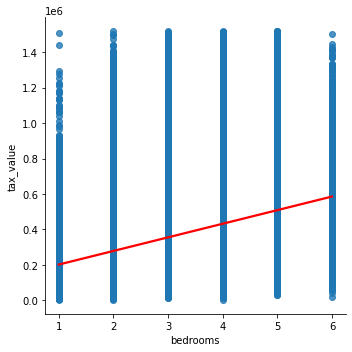

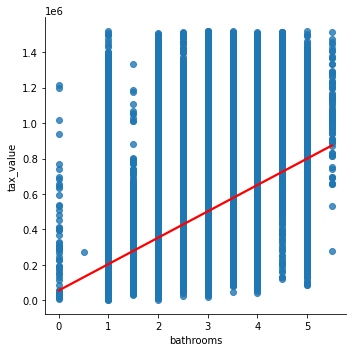

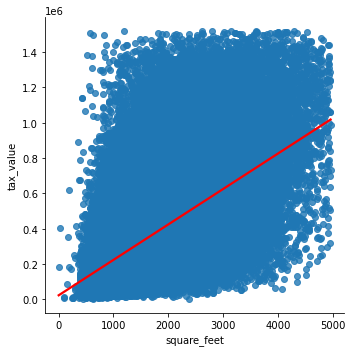

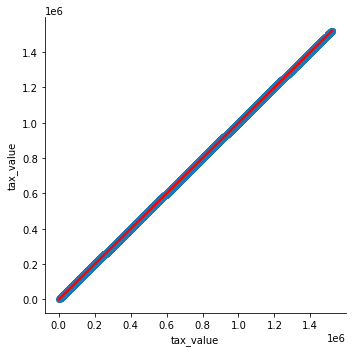

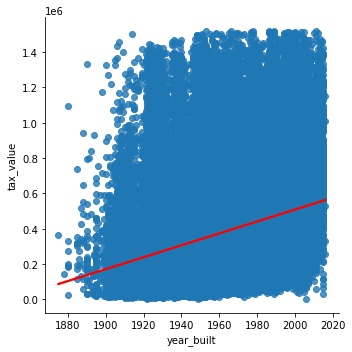

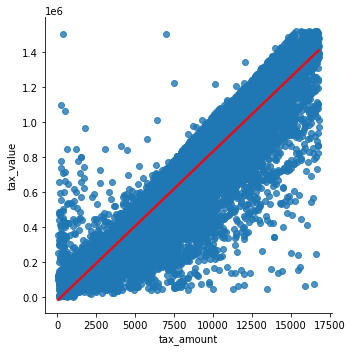

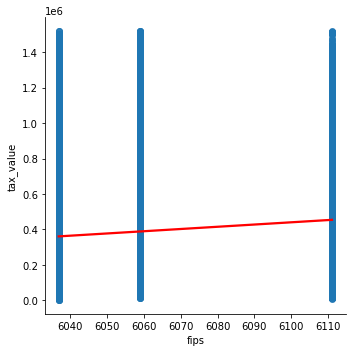

ValueError: could not convert string to float: 'Los Angeles'

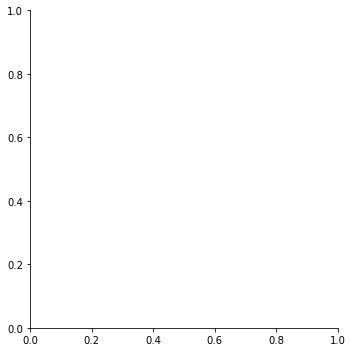

In [15]:
plot_variable_pair(sample)

### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [18]:
cat_vars = ['bedrooms', 'bathrooms', 'county']
cont_vars = ['square_feet', 'tax_value', 'tax_amount', 'home_age']

In [19]:
def plot_categorical_and_continuous_vars(df, cat_vars, cont_vars):
    for col in cat_vars:
        for col2 in cont_vars:
            fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
            fig.suptitle(f'{col} vs. {col2}')
            sns.boxplot(data=df, x=col, y=col2, ax=ax1)
            sns.violinplot(data=df, x=col, y=col2, ax=ax2)
            sns.barplot(data=df, x=col, y=col2, ax=ax3)
            plt.show()

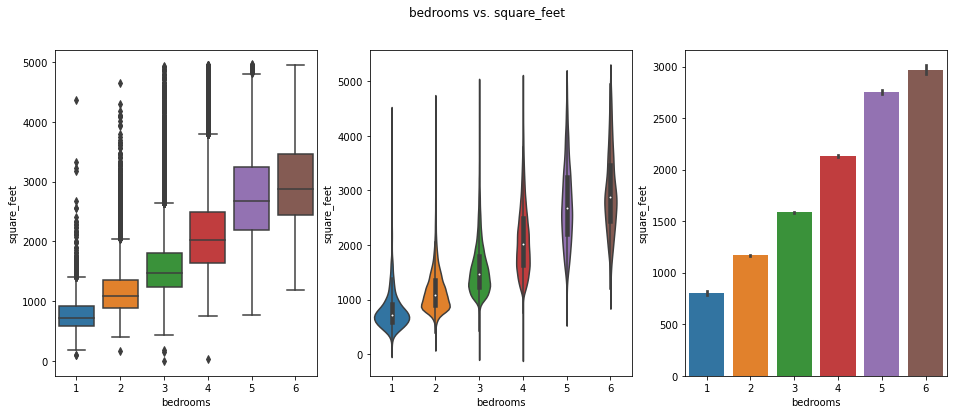

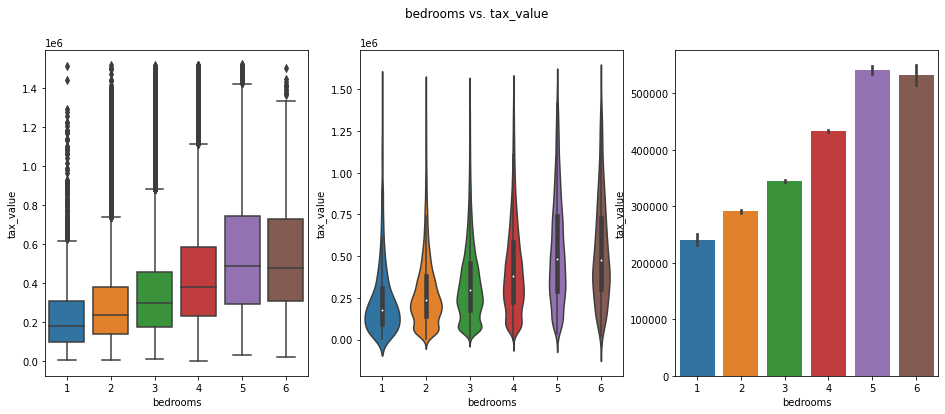

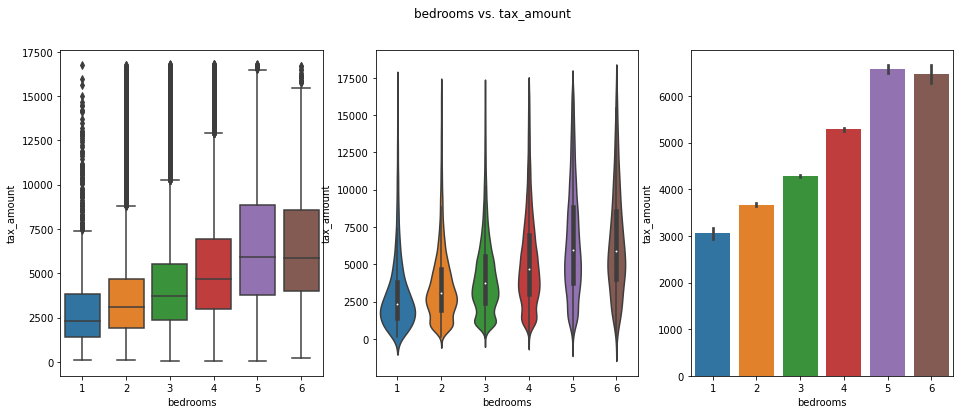

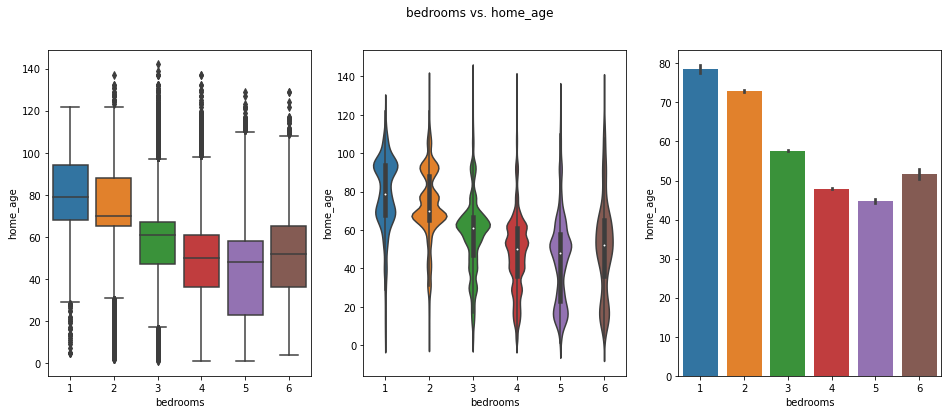

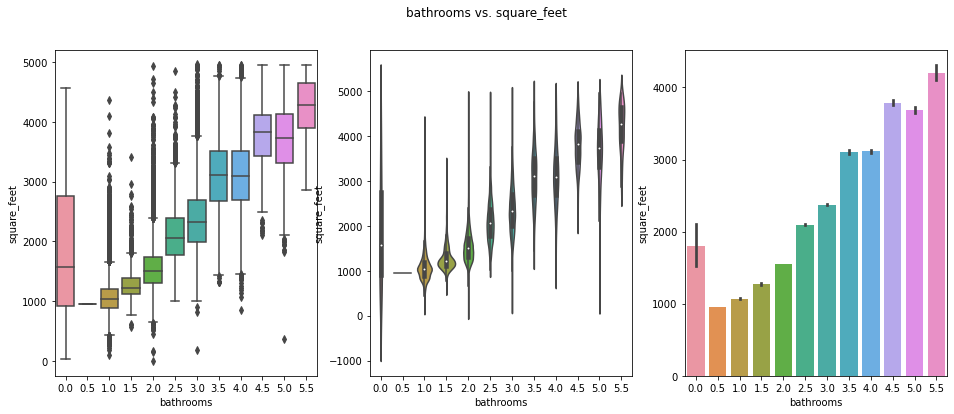

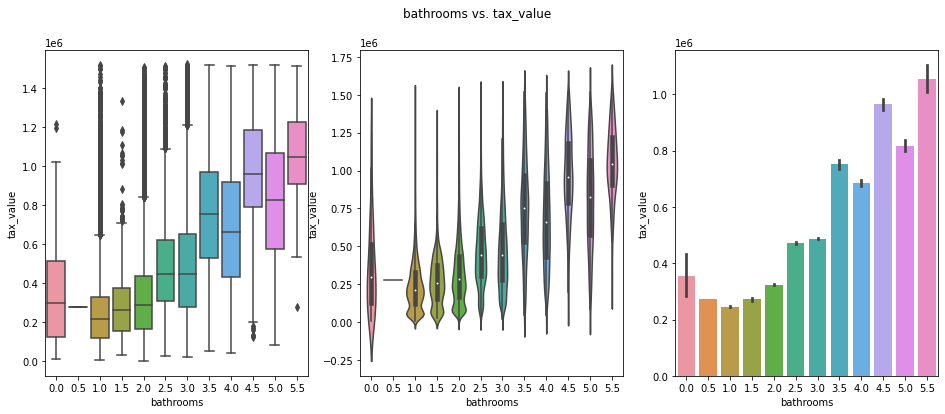

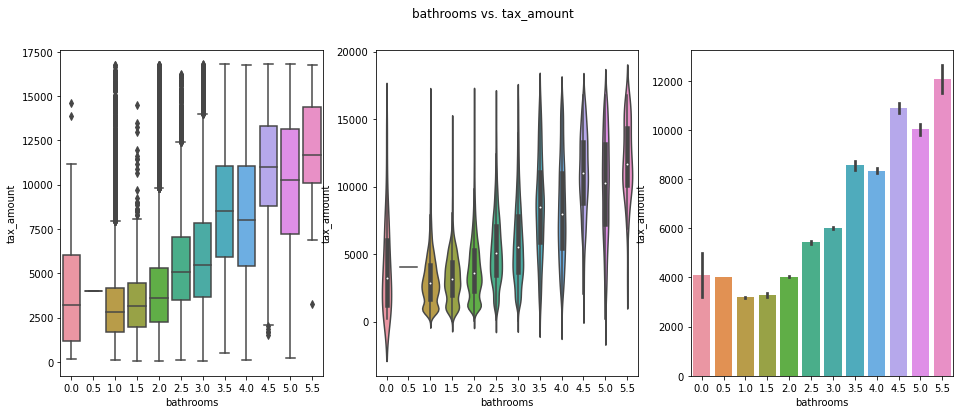

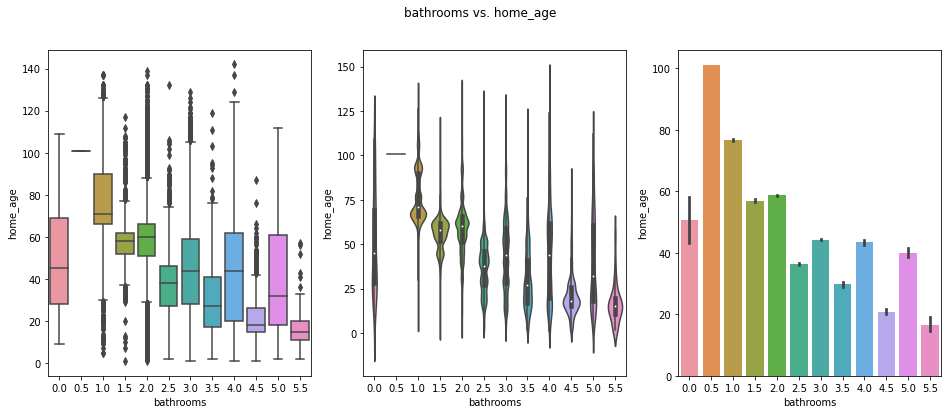

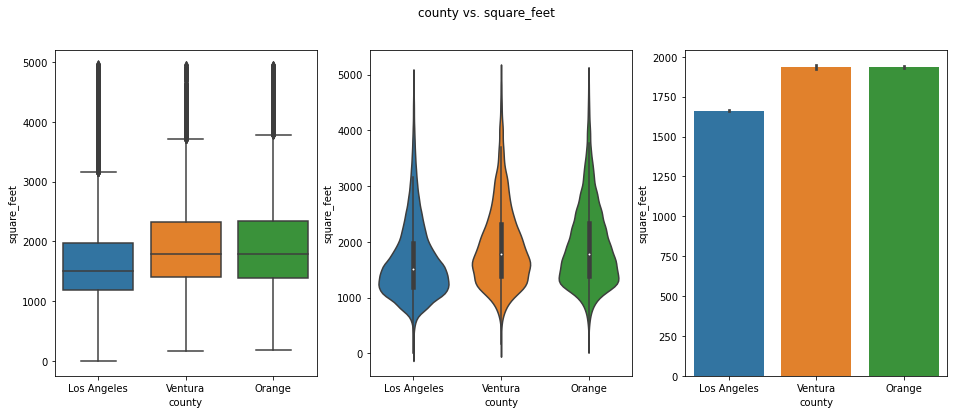

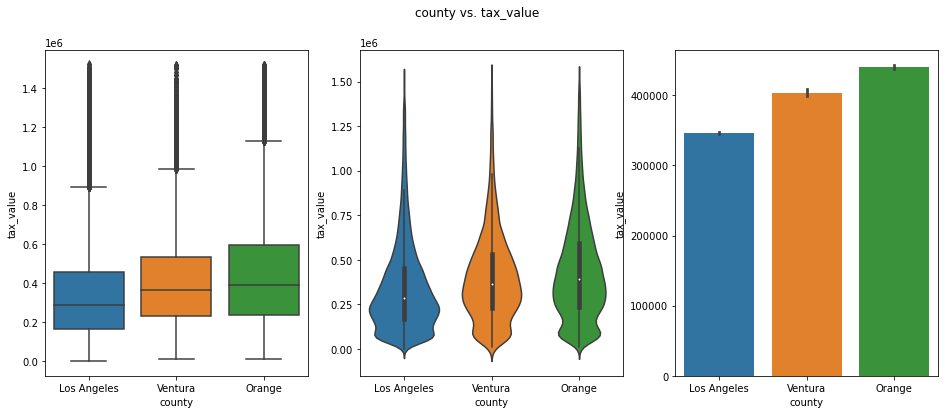

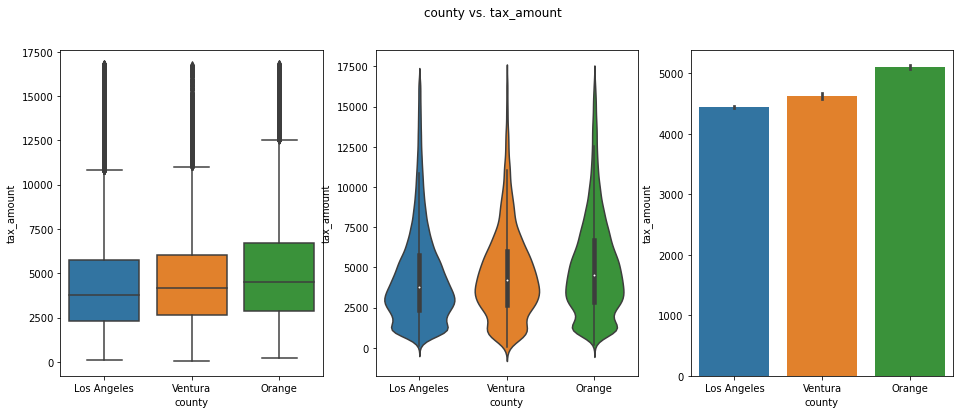

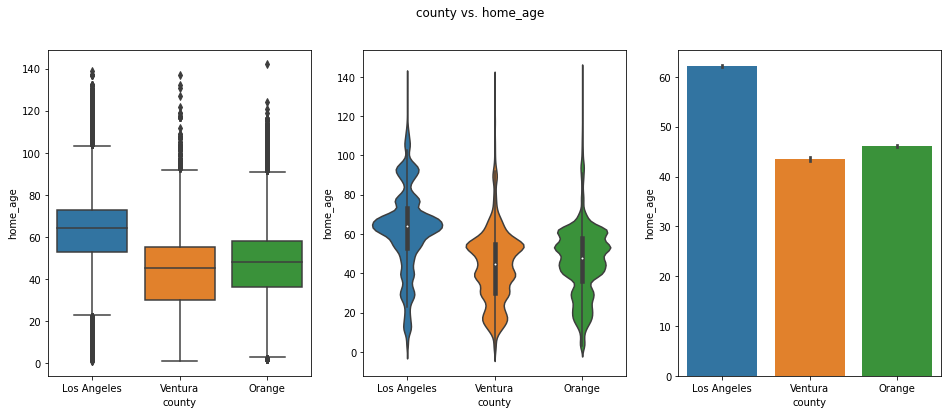

In [20]:
ex.plot_categorical_and_continuous_vars(sample, cat_vars, cont_vars)

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [ ]:
#See explore.py file

### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [ ]:
#See Code Below

### 7. Come up with some initial hypotheses based on your goal of predicting property value.

### 8.  Visualize all combinations of variables in some way.

### 9. Run the appropriate statistical tests where needed.

### 10. What independent variables are correlated with the dependent variable, home value?

### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

### 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

### 13. Explore your dataset with any other visualizations you think will be helpful.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044216 entries, 4 to 2152863
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   bedrooms     int64  
 1   bathrooms    float64
 2   square_feet  int64  
 3   tax_value    int64  
 4   year_built   int64  
 5   tax_amount   float64
 6   fips         int64  
 7   county       object 
 8   home_age     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 156.0+ MB


In [22]:
df.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
4,4,2.0,3633,296425,2005,6941.39,6037,Los Angeles,12
6,3,4.0,1620,847770,2011,10244.94,6037,Los Angeles,6


In [23]:
#Create column for home age using year_built
#train['home_age'] = 2017- train.year_built

## Categorical variable exploration

bedrooms
3    662202
4    422708
2    231270
5     87104
1     15846
6     11769
Name: bedrooms, dtype: int64
3    46.278738
4    29.541428
2    16.162566
5     6.087362
1     1.107416
6     0.822490
Name: bedrooms, dtype: float64


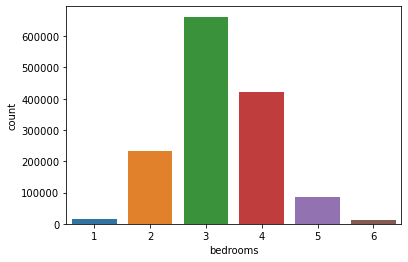

bathrooms
2.00    653850
1.00    287858
3.00    285327
2.50     99096
4.00     45853
1.50     21844
3.50     16946
5.00     10087
4.50      8479
5.50       934
0.00       615
0.50         7
1.75         3
Name: bathrooms, dtype: int64
2.00    45.695049
1.00    20.117283
3.00    19.940401
2.50     6.925436
4.00     3.204489
1.50     1.526593
3.50     1.184290
5.00     0.704941
4.50     0.592565
5.50     0.065274
0.00     0.042980
0.50     0.000489
1.75     0.000210
Name: bathrooms, dtype: float64


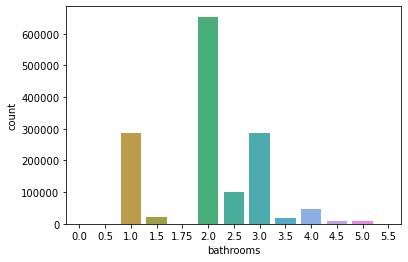

county
Los Angeles    951361
Orange         368088
Ventura        111450
Name: county, dtype: int64
Los Angeles    66.486943
Orange         25.724247
Ventura         7.788810
Name: county, dtype: float64


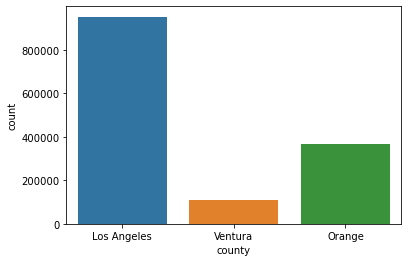

In [24]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

### Bedrooms

In [25]:
#Value Counts of bedrooms in training data set
train.bedrooms.value_counts()

3    662202
4    422708
2    231270
5     87104
1     15846
6     11769
Name: bedrooms, dtype: int64

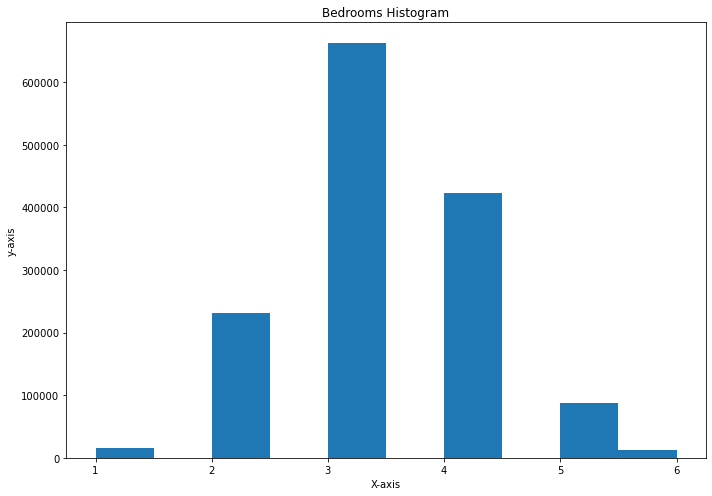

In [26]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.bedrooms)
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Bedrooms Histogram')
 
# Show plot
plt.show()

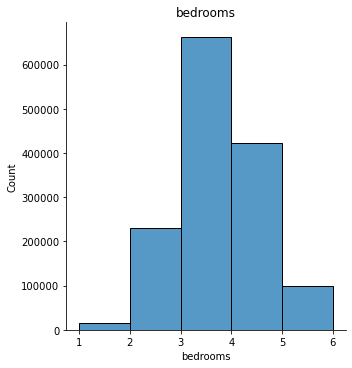

In [27]:
#Displot
sns.displot(x='bedrooms', data=train, bins=5)
plt.title('bedrooms')
plt.show()

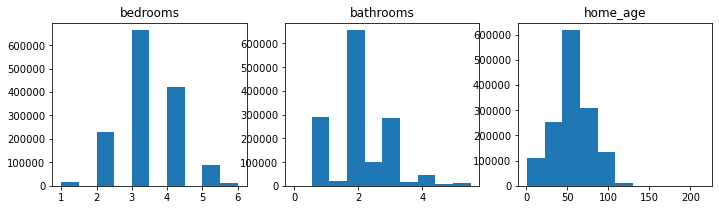

In [28]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'home_age']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=10)
    # Hide gridlines.
    plt.grid(False)

In [29]:
#Descriptive statistics
print(f'Mean bedrooms = {train.bedrooms.mean()}')
print(f'Median Bedrooms = {train.bedrooms.median()}')
print(f'Mode Bedrooms = {train.bedrooms.mode()}')
print(f'Max Bedrooms = {train.bedrooms.max()}')
print(f'Min Bedrooms = {train.bedrooms.min()}')

Mean bedrooms = 3.2580622391936815
Median Bedrooms = 3.0
Mode Bedrooms = 0    3
Name: bedrooms, dtype: int64
Max Bedrooms = 6
Min Bedrooms = 1


### Bathrooms

In [30]:
train.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
1476460,3,2.0,1460,82993,1954,1053.85,6037,Los Angeles,63
1900077,3,2.0,1206,275867,1942,3438.72,6037,Los Angeles,75


In [31]:
#Bathrooms in train data set
train.bathrooms.value_counts()

2.00    653850
1.00    287858
3.00    285327
2.50     99096
4.00     45853
1.50     21844
3.50     16946
5.00     10087
4.50      8479
5.50       934
0.00       615
0.50         7
1.75         3
Name: bathrooms, dtype: int64

In [32]:
#Descriptive statistics of bathrooms
print(f'Mean Bathrooms = {train.bathrooms.mean()}')
print(f'Median Bathrooms = {train.bathrooms.median()}')
print(f'Mode Bathrooms = {train.bathrooms.mode()}')
print(f'Max Bathrooms = {train.bathrooms.max()}')
print(f'Min Bathrooms = {train.bathrooms.min()}')

Mean Bathrooms = 2.144459007938366
Median Bathrooms = 2.0
Mode Bathrooms = 0    2.0
Name: bathrooms, dtype: float64
Max Bathrooms = 5.5
Min Bathrooms = 0.0


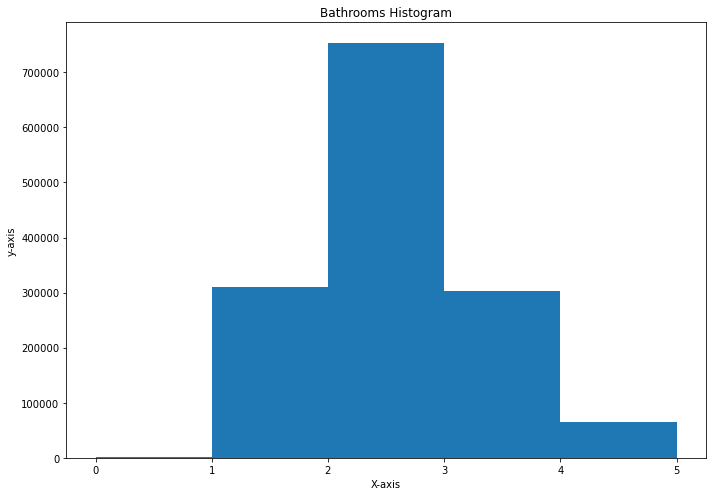

In [33]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.bathrooms, bins = [0, 1,2,3,4,5])
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Bathrooms Histogram')
 
# Show plot
plt.show()

#### Appears to be normally distributed

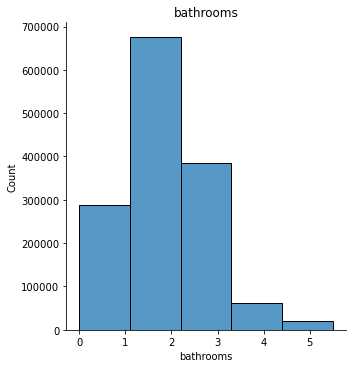

In [34]:
#Displot
sns.displot(x='bathrooms', data=train, bins=5)
plt.title('bathrooms')
plt.show()

### Home_age

In [35]:
#Age of homes in dataset
train.home_age.value_counts()

62     58183
67     49013
63     47556
64     42949
61     42675
       ...  
143        1
138        1
194        1
147        1
162        1
Name: home_age, Length: 150, dtype: int64

In [36]:
#Descriptive statistics
print(f'Mean Home Age = {train.home_age.mean()}')
print(f'Median Home Age = {train.home_age.median()}')
print(f'Mode Home Age = {train.home_age.mode()}')
print(f'Max Home Age = {train.home_age.max()}')
print(f'Min Home Age = {train.home_age.min()}')

Mean Home Age = 56.64680246474419
Median Home Age = 59.0
Mode Home Age = 0    62
Name: home_age, dtype: int64
Max Home Age = 216
Min Home Age = 1


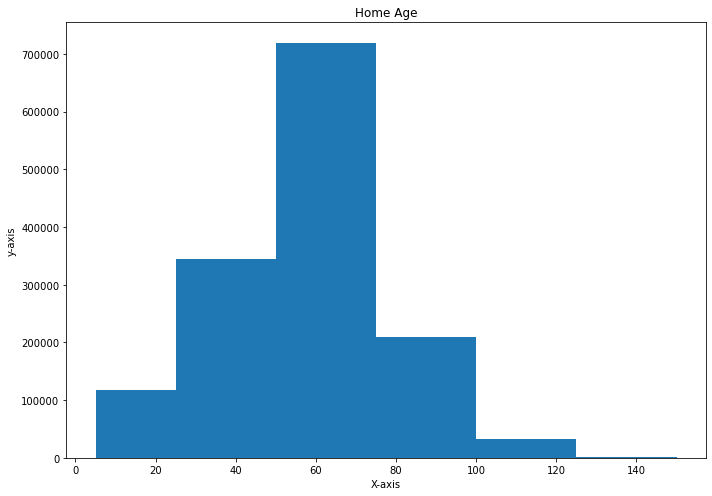

In [37]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.home_age, bins = [5, 25, 50, 75, 100, 125, 150])
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Home Age')
 
# Show plot
plt.show()

#### Again, appears to be normally distributed

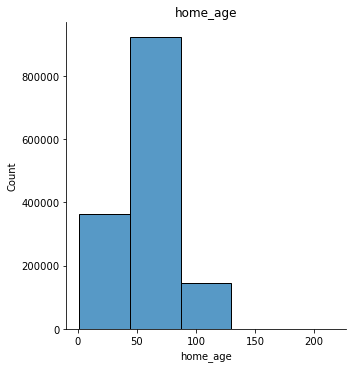

In [38]:
#Displot
sns.displot(x='home_age', data=train, bins=5)
plt.title('home_age')
plt.show()

### County

In [39]:
#Value counts of county
train.county.value_counts()

Los Angeles    951361
Orange         368088
Ventura        111450
Name: county, dtype: int64

In [40]:
### FIPS--labeling fips--placed into clean file
    ##zillow['fips'] = zillow.fips.astype(int)
    ##zillow['fips_loc'] = zillow.fips.replace({6037:'Los Angeles, CA',
                       ##6059:'Orange, CA',
                       ##6111:'Ventura, CA'})

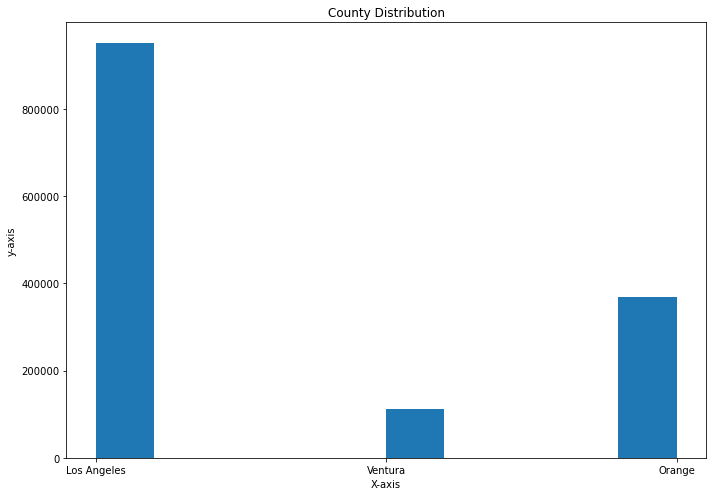

In [41]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.county)
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('County Distribution')
 
# Show plot
plt.show()

## Univariate Exploration of Continuous Variables

In [42]:
train.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
1476460,3,2.0,1460,82993,1954,1053.85,6037,Los Angeles,63
1900077,3,2.0,1206,275867,1942,3438.72,6037,Los Angeles,75


In [43]:
num_vars = ['square_feet', 'tax_value', 'tax_amount', 'home_age']
cat_vars = ['bedrooms', 'bathrooms', 'county']

Mean square_feet is: 1754.046418370549


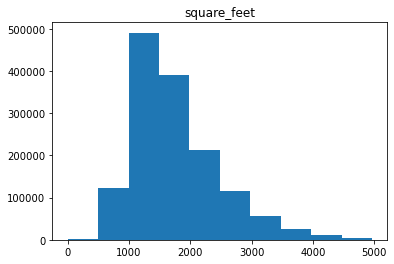

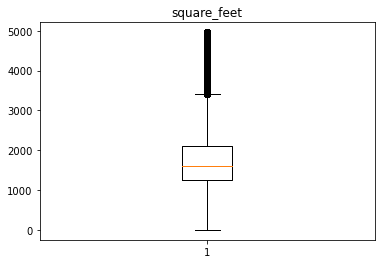

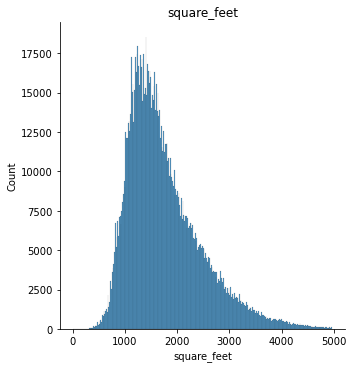

Mean tax_value is: 373835.9094080015


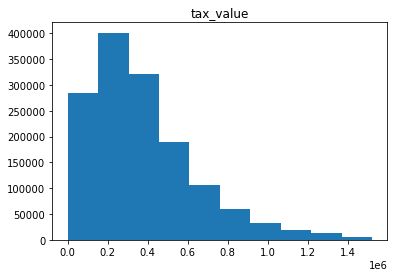

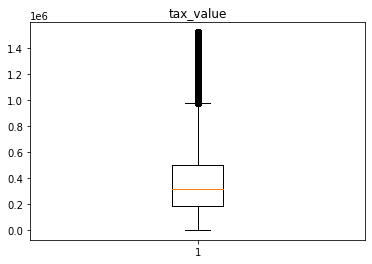

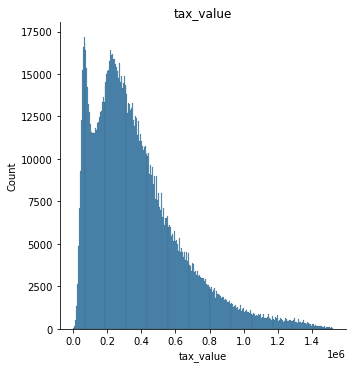

Mean tax_amount is: 4613.3546860050865


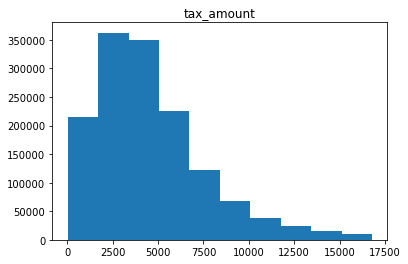

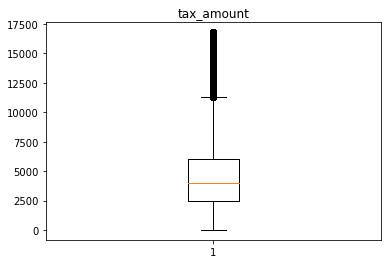

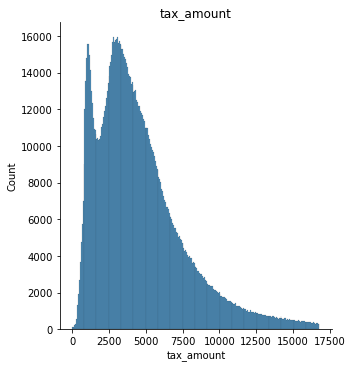

Mean home_age is: 56.64680246474419


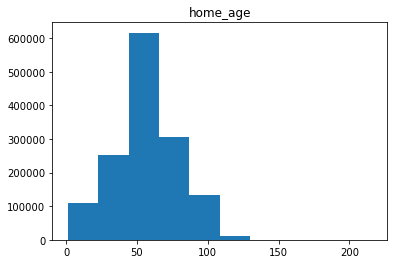

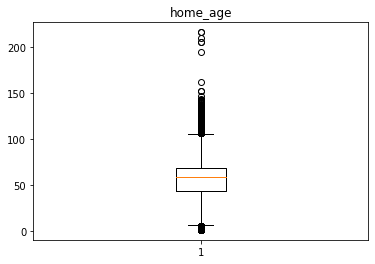

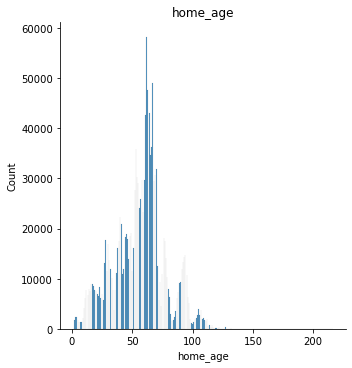

In [44]:
#Visualize other numeric data
# Plot numeric columns
for col in num_vars:
    print(f'Mean {col} is: {train[col].mean()}')
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()
    sns.displot(train[col])
    plt.title(col)
    plt.show()

### Square Footage

In [45]:
#Descriptive statistics
print(f'Mean Square Feet = {train.square_feet.mean()}')
print(f'Median Square Feet = {train.square_feet.median()}')
print(f'Mode Square Feet = {train.square_feet.mode()}')
print(f'Max Square Feet = {train.square_feet.max()}')
print(f'Min Square Feet = {train.square_feet.min()}')

Mean Square Feet = 1754.046418370549
Median Square Feet = 1593.0
Mode Square Feet = 0    1200
Name: square_feet, dtype: int64
Max Square Feet = 4962
Min Square Feet = 1


### Tax Value (Price)

In [46]:
train.tax_value.mean()

373835.9094080015

In [47]:
train.groupby('bedrooms').tax_value.mean()

bedrooms
1    239546.456203
2    291288.820785
3    343991.652890
4    431410.300162
5    544020.656434
6    528531.673209
Name: tax_value, dtype: float64

In [48]:
#Descriptive statistics
print(f'Mean Tax Value = {train.tax_value.mean()}')
print(f'Median Tax Value = {train.tax_value.median()}')
print(f'Mode Tax Value = {train.tax_value.mode()}')
print(f'Max Tax Value = {train.tax_value.max()}')
print(f'Min Tax Value = {train.tax_value.min()}')

Mean Tax Value = 373835.9094080015
Median Tax Value = 315836.0
Mode Tax Value = 0    450000
Name: tax_value, dtype: int64
Max Tax Value = 1520905
Min Tax Value = 22


In [49]:
train[train.bathrooms == 0]

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
21660,2,0.0,1586,107566,1954,1227.66,6111,Ventura,63
1004047,1,0.0,458,115100,1924,2165.99,6037,Los Angeles,93
344725,4,0.0,2193,96326,1967,1039.28,6111,Ventura,50
646645,6,0.0,4110,837491,1989,8987.88,6111,Ventura,28
766684,1,0.0,280,12219,1958,277.55,6037,Los Angeles,59
...,...,...,...,...,...,...,...,...,...
1991803,4,0.0,2655,543098,1987,6052.02,6111,Ventura,30
258715,5,0.0,1548,267738,1967,2935.30,6111,Ventura,50
948374,4,0.0,1994,584039,1963,6229.42,6111,Ventura,54
668349,4,0.0,2096,217204,1990,2356.54,6111,Ventura,27


### Tax Amount

In [50]:
#Descriptive statistics
print(f'Mean Tax Amount = {train.tax_amount.mean()}')
print(f'Median Tax Amount = {train.tax_amount.median()}')
print(f'Mode Tax Amount = {train.tax_amount.mode()}')
print(f'Max Tax Amount = {train.tax_amount.max()}')
print(f'Min Tax Amount = {train.tax_amount.min()}')

Mean Tax Amount = 4613.3546860050865
Median Tax Amount = 3969.76
Mode Tax Amount = 0    345.72
Name: tax_amount, dtype: float64
Max Tax Amount = 16788.29
Min Tax Amount = 16.48


## Multivariate Analysis

In [51]:
train.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
1476460,3,2.0,1460,82993,1954,1053.85,6037,Los Angeles,63
1900077,3,2.0,1206,275867,1942,3438.72,6037,Los Angeles,75


In [52]:
# create the correlation matrix using pandas .corr()
#Drop columns not needed for this
zillow_corr = sample.drop(columns=['year_built', 'county']).corr(method='spearman')

In [53]:
zillow_corr

,bedrooms,bathrooms,square_feet,tax_value,tax_amount,fips,home_age
bedrooms,1.000000,0.614926,0.640455,0.253199,0.254607,0.187662,-0.431486
bathrooms,0.614926,1.000000,0.810848,0.427554,0.427372,0.197446,-0.578928
square_feet,0.640455,0.810848,1.000000,0.469083,0.466461,0.196588,-0.514721
tax_value,0.253199,0.427554,0.469083,1.000000,0.976468,0.163807,-0.275556
tax_amount,0.254607,0.427372,0.466461,0.976468,1.000000,0.094518,-0.274198
fips,0.187662,0.197446,0.196588,0.163807,0.094518,1.000000,-0.415356
home_age,-0.431486,-0.578928,-0.514721,-0.275556,-0.274198,-0.415356,1.000000


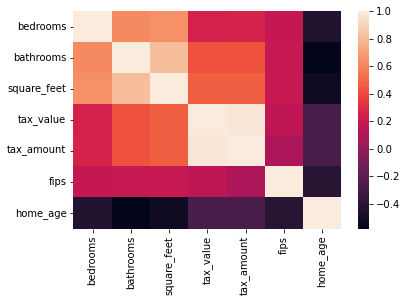

In [54]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(zillow_corr)
plt.show()

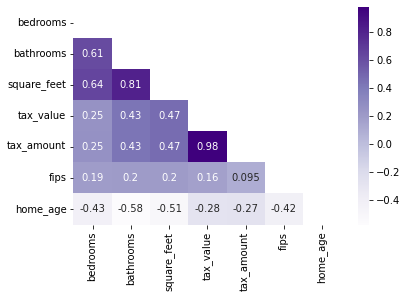

In [55]:
# pass my correlation matrix to Seaborn's heatmap with customization
sns.heatmap(zillow_corr, cmap='Purples', annot=True, 
            mask=np.triu(zillow_corr))
plt.show()

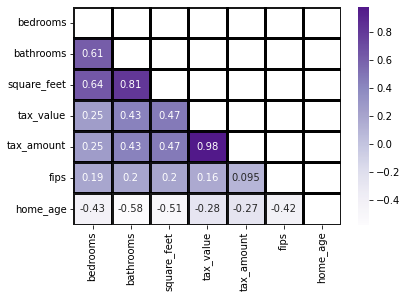

In [56]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(zillow_corr, cmap='Purples', annot=True, 
            mask=np.triu(zillow_corr), **kwargs)
plt.show()

# Testing Relationships

### Variance Inflation Factor

In [57]:
train.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
1476460,3,2.0,1460,82993,1954,1053.85,6037,Los Angeles,63
1900077,3,2.0,1206,275867,1942,3438.72,6037,Los Angeles,75


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
#Using all variables for this first
X = train[['bedrooms', 'bathrooms', 'square_feet', 'home_age', 'tax_amount', 'fips']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,bedrooms,26.762318
1,bathrooms,25.928632
2,square_feet,24.771315
3,home_age,11.175034
4,tax_amount,4.792082
5,fips,40.834337


In [60]:
#Trying VIF again with limited variables
X = train[['home_age','tax_amount', 'square_feet']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,home_age,2.818236
1,tax_amount,4.667450
2,square_feet,6.183217


### These three features seem the best at reducing multicolinearity

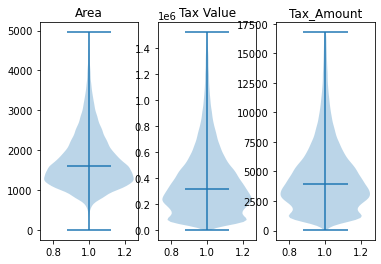

In [61]:
#Violin Plot
area = sample.square_feet
tax_value = sample.tax_value
tax_amount = sample.tax_amount

# Create figure with three axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# Plot violin plot on axes 1
ax1.violinplot(area, showmedians=True)
ax1.set_title('Area')

# Plot violin plot on axes 2
ax2.violinplot(tax_value, showmedians=True)
ax2.set_title('Tax Value')

# Plot violin plot on axes 3
ax3.violinplot(tax_amount, showmedians=True)
ax3.set_title('Tax_Amount')

plt.show()

## Bivariate analysis

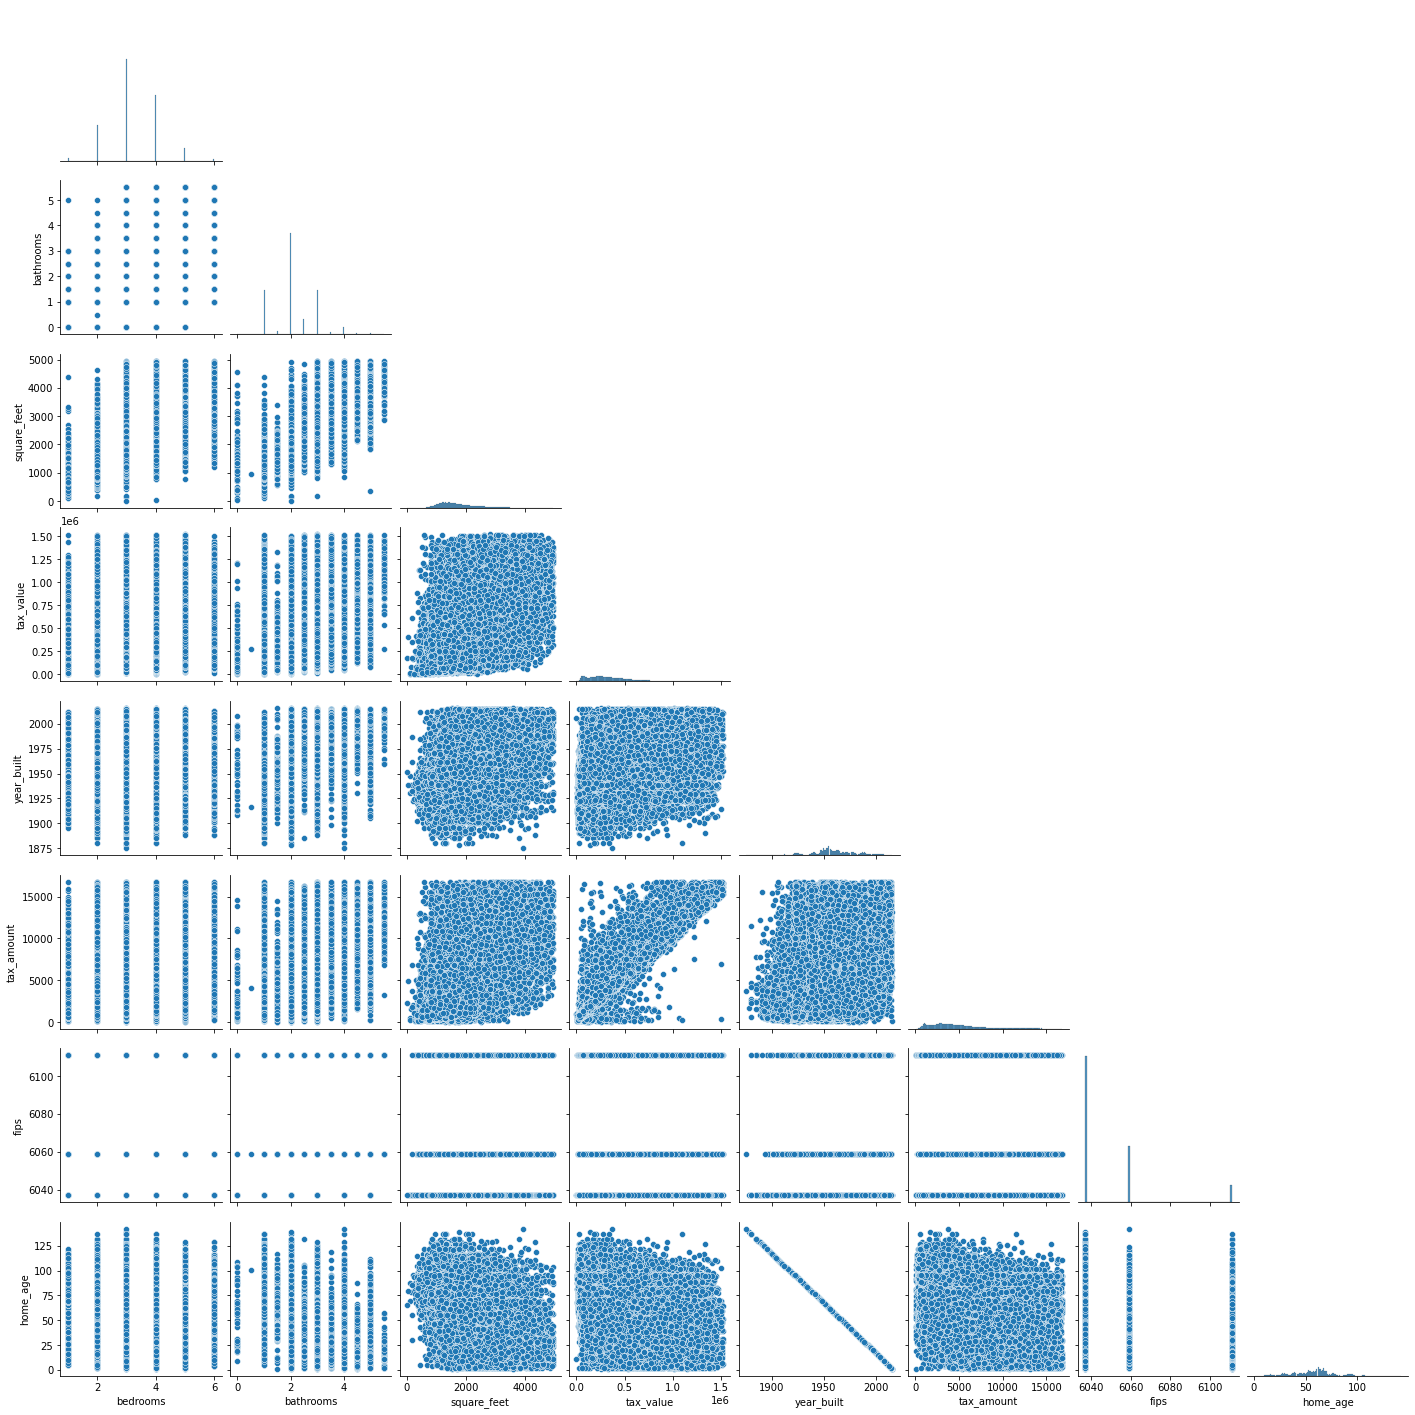

In [62]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(data=sample.drop(columns='county'),
            corner=True)
plt.show()

## Continuous vs. Continous

<AxesSubplot:xlabel='tax_amount', ylabel='tax_value'>

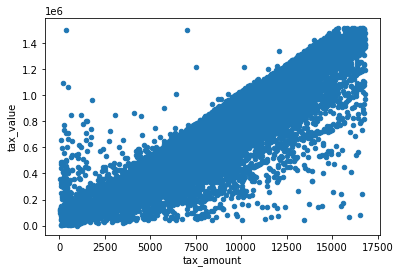

In [63]:
#Scatter
sample.plot.scatter(x = 'tax_amount', y = 'tax_value')

## Discrete vs. Continuous

In [ ]:
sns.swarmplot(x='tax_amount', y='tax_value', data=sample)

### Area

In [64]:
sample.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
1942364,3,2.0,1054,239252,1925,3181.95,6037,Los Angeles,92
603976,4,2.0,1906,209995,1956,2593.86,6037,Los Angeles,61
1863926,2,1.0,1082,268380,1944,3326.76,6037,Los Angeles,73
1114984,3,2.0,1555,305049,1962,6808.93,6037,Los Angeles,55
500867,3,2.0,1523,115350,1952,1683.83,6037,Los Angeles,65


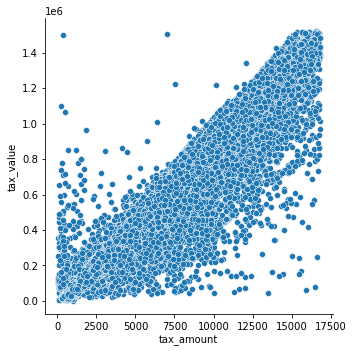

In [65]:
sns.relplot(data=sample, x='tax_amount', y='tax_value')
plt.show()

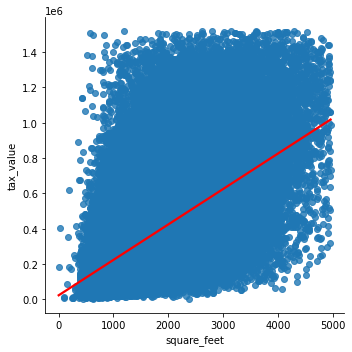

In [66]:
# I can really pop that line color if I want
sns.lmplot(data=sample, x='square_feet', y='tax_value',
           line_kws={'color':'red'})
plt.show()

### Running Pearson's Correlation between Square Footage (Area) vs Tax Value

In [67]:
corr, p = stats.pearsonr(train.square_feet, train.tax_value)
corr, p

(0.5384666017525199, 0.0)

#### Significant Relationship

### Running Spearman's Correlation between Tax_amount vs Tax Value

In [68]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = stats.spearmanr(train.tax_amount, train.tax_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.9763295132976316
P-value: 0.0


#### Very strong relationship

### Running Spearman's Correlation between tax value vs home_age

In [69]:
### Running Spearman's Correlation between Val vs home_age
corr, p = stats.pearsonr(train.tax_value, train.home_age)
corr, p

(-0.2769991516342008, 0.0)

#### Significant relationship

## Running spearman's correlation between all variables

In [70]:
cols = train.columns.to_list()

In [71]:
cols

['bedrooms',
 'bathrooms',
 'square_feet',
 'tax_value',
 'year_built',
 'tax_amount',
 'fips',
 'county',
 'home_age']

In [72]:
cols.remove('year_built')
cols.remove('county')

In [73]:
cols

['bedrooms',
 'bathrooms',
 'square_feet',
 'tax_value',
 'tax_amount',
 'fips',
 'home_age']

In [74]:
for col in cols:
    r, p_value = stats.spearmanr(train['tax_value'], 
                                 train[col])
    print(f'Comparing tax_value with {col}')
    print(f'Correlation Coefficient: {r}\nP-value: {p_value}\n')
    print('---------------------------\n')

Comparing tax_value with bedrooms
Correlation Coefficient: 0.2537790384051215
P-value: 0.0

---------------------------

Comparing tax_value with bathrooms
Correlation Coefficient: 0.42757627202413734
P-value: 0.0

---------------------------

Comparing tax_value with square_feet
Correlation Coefficient: 0.471045708935284
P-value: 0.0

---------------------------

Comparing tax_value with tax_value
Correlation Coefficient: 0.9999999999999999
P-value: 0.0

---------------------------

Comparing tax_value with tax_amount
Correlation Coefficient: 0.9763295132976317
P-value: 0.0

---------------------------

Comparing tax_value with fips
Correlation Coefficient: 0.16541848869653367
P-value: 0.0

---------------------------

Comparing tax_value with home_age
Correlation Coefficient: -0.2771510484749993
P-value: 0.0

---------------------------



In [75]:
for col in cols:
    for col2 in cols:
        r, p_value = stats.spearmanr(train[col], 
                                     train[col2])
        print(f'Comparing {col} with {col2}')
        print(f'Correlation Coefficient: {r}\nP-value: {p_value}\n')
        print('---------------------------\n')

Comparing bedrooms with bedrooms
Correlation Coefficient: 0.9999999999999999
P-value: 0.0

---------------------------

Comparing bedrooms with bathrooms
Correlation Coefficient: 0.6144484284558706
P-value: 0.0

---------------------------

Comparing bedrooms with square_feet
Correlation Coefficient: 0.6406160700068525
P-value: 0.0

---------------------------

Comparing bedrooms with tax_value
Correlation Coefficient: 0.2537790384051215
P-value: 0.0

---------------------------

Comparing bedrooms with tax_amount
Correlation Coefficient: 0.25546206690849577
P-value: 0.0

---------------------------

Comparing bedrooms with fips
Correlation Coefficient: 0.18937711525338333
P-value: 0.0

---------------------------

Comparing bedrooms with home_age
Correlation Coefficient: -0.4280573503684238
P-value: 0.0

---------------------------

Comparing bathrooms with bedrooms
Correlation Coefficient: 0.6144484284558706
P-value: 0.0

---------------------------

Comparing bathrooms with bathroom

In [ ]:
train.info()

In [ ]:
#Running Chi-Square Test between bedrooms and bathrooms


### Looking at Tax Value with FIPS data

In [17]:
LA = train[train.county == 'Los Angeles']
Ventura = train[train.county == 'Ventura']
Orange = train[train.county == 'Orange']

In [18]:
print(f'LA Mean Tax Value is: {round(LA.tax_value.mean())}')
print(f'Ventura Mean Tax Value is: {round(Ventura.tax_value.mean())}')
print(f'Orange Mean Tax Value is: {round(Orange.tax_value.mean())}')

LA Mean Tax Value is: 345167
Ventura Mean Tax Value is: 404903
Orange Mean Tax Value is: 438526


In [78]:
#Trying to run an ANOVA to compare mean tax value between these zip codes

In [79]:
LA.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
1476460,3,2.0,1460,82993,1954,1053.85,6037,Los Angeles,63
1900077,3,2.0,1206,275867,1942,3438.72,6037,Los Angeles,75


In [80]:
#Creating Series for each location with tax value
LA_tax_value = LA.tax_value
Ventura_tax_value = Ventura.tax_value
Orange_tax_value = Orange.tax_value

In [81]:
LA_tax_value.info()

<class 'pandas.core.series.Series'>
Int64Index: 951361 entries, 1476460 to 1771238
Series name: tax_value
Non-Null Count   Dtype
--------------   -----
951361 non-null  int64
dtypes: int64(1)
memory usage: 14.5 MB


### Establish Hypotheses:

- H^0: population means of the tax value for the three counties, LA, Ventura & Orange, are all equal.
- H^a: population means of the tax value for the three counties, LA, Ventura & ORange, are NOT all equal.

In [19]:
#Set significance level 
alpha = 0.05

In [83]:
#Need to ensure variances are equal
stat, pval = stats.levene(LA.tax_value, Ventura.tax_value, Orange.tax_value)
pval
# pval is significant so we can conclude variances are NOT equal

0.0

In [84]:
f, p = stats.f_oneway(LA.tax_value, Ventura.tax_value, Orange.tax_value)
f, p

TypeError: f_oneway() got an unexpected keyword argument 'equal_variance'

In [85]:
if p < alpha:
    print("We reject the null hypothesis that population means of the tax value for the three counties, LA, Ventura & Orange, are all equal.")
else:
    print("We fail to reject H^0: The population means of the tax value for the three counties, LA, Ventura & ORange, are NOT all equal.")

We reject the null hypothesis that population means of the tax value for the three counties, LA, Ventura & Orange, are all equal.


### Looking at Home Age

In [13]:
print(f'Mean Home Age is: {train.home_age.mean()}')
print(f'Median Home Age is: {train.home_age.median()}')

Mean Home Age is: 56.64680246474419
Median Home Age is: 59.0


In [16]:
#Can we bin home age?
#Number of antique homes in train
print(f'Number of antique homes in train is: {len(train[train.home_age >= 100])}')
print(f'Number of Vintage homes in train is: {len(train[(train.home_age >= 20) & (train.home_age < 100)])}')
print(f'Number of Modern homes in train is: {len(train[train.home_age < 20])}')

Number of antique homes in train is: 33944
Number of Vintage homes in train is: 1308414
Number of Modern homes in train is: 88541


In [88]:
len(train)

1430899

### Antique homes and vintage is a cool feature, but binning doesn't seem effective with such a large amount falling in the 20-100 year range

<AxesSubplot:>

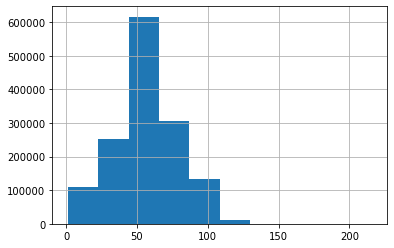

In [89]:
train.home_age.hist()

In [90]:
#I could look at home age as continuous, so lets try a correlation test
corr, p = stats.pearsonr(train.home_age, train.tax_value)
corr, p

(-0.2769991516342008, 0.0)

#### Significant Relationship with a negative P value

### Let's look at bathrooms

In [91]:
#Mean bathroom
train.bathrooms.mean()

2.144459007938366

In [92]:
train.bathrooms.value_counts()

2.00    653850
1.00    287858
3.00    285327
2.50     99096
4.00     45853
1.50     21844
3.50     16946
5.00     10087
4.50      8479
5.50       934
0.00       615
0.50         7
1.75         3
Name: bathrooms, dtype: int64

Range of bathrooms in my train dataset is: 5.5


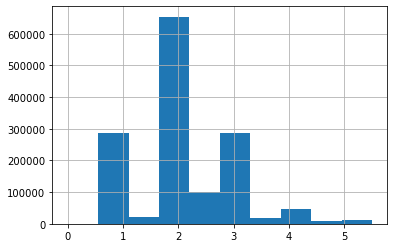

In [93]:
#Treating bathrooms as categorical
train.bathrooms.hist()
print(f'Range of bathrooms in my train dataset is: {train.bathrooms.max() - train.bathrooms.min()}')

#### I don't believe that treating bathrooms as categorical is the best option--too many categories, and too much difference between half/3/4 bathrooms that make a real difference to home buyers

In [94]:
corr, p = stats.pearsonr(train.bathrooms, train.tax_value)
corr, p

(0.4592134151519009, 0.0)

#### As shown above, this seems to be a good indicator of value, possibly better than bedrooms. I believe this is because bathrooms, number of, is more of a driver of home value than bedrooms! The cost of additional bathrooms is higher than additional bedrooms. Also, some rooms can be considered bedrooms that were previously not used as bedrooms (they now have a closet). It is much more difficult to add on bathrooms, and consumers prefer more bathrooms and consider them necessities?

### Looking at Tax amount, but this may pr